<a href="https://colab.research.google.com/github/vineelabaisa9119/2216119_AIML_BootCamp/blob/main/Copy_of_logistic_regressionEx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df=pd.read_csv("/content/SUV_Purchase.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


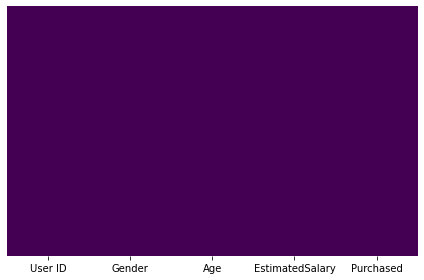

In [8]:
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

In [9]:
df = df.drop('User ID',axis=1)
df = df.drop('Gender',axis=1)

In [10]:
x=df.iloc[:,:-1].values 
y=df.iloc[:,-1:].values

#method 2 to load the data in the form of arrays -by library numpy

#import numpy as np

#x=np.array(data_scaled[['EstimatedSalary','Age']])

#y=np.array(data_scaled[['Purchased']])

In [11]:
#spliting the data  into training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [13]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [14]:
x_train

array([[    58, 144000],
       [    59,  83000],
       [    24,  55000],
       [    26,  35000],
       [    58,  38000],
       [    42,  80000],
       [    40,  75000],
       [    59, 130000],
       [    46,  41000],
       [    41,  60000],
       [    42,  64000],
       [    37, 146000],
       [    23,  48000],
       [    25,  33000],
       [    24,  84000],
       [    27,  96000],
       [    23,  63000],
       [    48,  33000],
       [    48,  90000],
       [    42, 104000],
       [    44,  39000],
       [    32, 120000],
       [    38,  50000],
       [    32, 135000],
       [    52,  21000],
       [    53, 104000],
       [    39,  42000],
       [    38,  61000],
       [    36,  50000],
       [    36,  63000],
       [    35,  25000],
       [    35,  50000],
       [    42,  73000],
       [    47,  49000],
       [    59,  29000],
       [    49,  65000],
       [    45, 131000],
       [    31,  89000],
       [    46,  82000],
       [    47,  51000],


In [15]:
# Importing StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler
sst = StandardScaler()

x_train=data_scaled=sst.fit_transform(x_train)


In [16]:
x_train

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

In [17]:
y_pred=model.predict(sst.transform(x_test))
#np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

In [18]:
print("Predicted value for training data:",model.score(x_train,y_train))
print("Training accuracy:",model.score(x_train,y_train)*100)

Predicted value for training data: 0.36875
Training accuracy: 36.875


In [19]:
print("Predicted value for testing data:",model.score(sst.transform(x_test),y_test))
print("Testing accuracy:",model.score(sst.transform(x_test),y_test)*100)

Predicted value for testing data: 0.4125
Testing accuracy: 41.25


In [20]:
accuracy=model.score(x,y)*100
print(accuracy)

64.25


In [21]:
age=int(input("Enter age"))
sal=int(input("estimated salary"))
output=model.predict(sst.transform([[age,sal]]))
print(output)
if output[0]==1:
  print("Customer can purchase the SUV")
else:
  print("Customer can't purchase the SUV")

Enter age34
estimated salary23000
[1]
Customer can purchase the SUV


In [22]:
80

80